Hosts inicializados
Canais inicializados
Pares EPRs adicionados


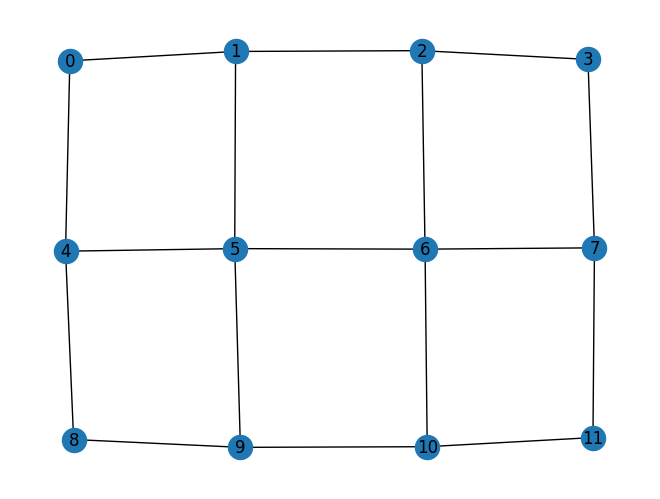

In [1]:
from quantumnet.components import Controller, Network
rede = Network()
controlador = Controller(rede)
row, col = 3, 4
rede.set_ready_topology("Grade", row, col)
rede.draw()

In [2]:
import random

def generate_random_request(num_hosts, fmin_range=(0.5, 1.0), eprs_range=(1, 10)):
    """
    Gera uma request aleatória para a rede quântica.

    Args:
        num_hosts (int): Número total de hosts na rede.
        fmin_range (tuple): Intervalo para o valor mínimo de fidelidade (fmin).
        eprs_range (tuple): Intervalo para o número de pares EPR requeridos.

    Returns:
        list: Uma request no formato [alice_id, bob_id, fmin, eprs].
    """
    alice_id = random.randint(0, num_hosts - 1)
    bob_id = random.randint(0, num_hosts - 1)

    # Garantir que Alice e Bob não sejam o mesmo host
    while bob_id == alice_id:
        bob_id = random.randint(0, num_hosts - 1)

    fmin = round(random.uniform(*fmin_range), 2)  
    eprs = random.randint(*eprs_range)            

    return [alice_id, bob_id, fmin, eprs]

random_request = generate_random_request(num_hosts=10)
print(random_request)


[0, 1, 0.89, 7]


In [3]:
all_requests = []
for i in range(100):
    request = generate_random_request(num_hosts=10)
    all_requests.append(request)
print(all_requests)

[[9, 7, 0.64, 5], [1, 5, 0.59, 10], [9, 0, 0.52, 7], [0, 2, 0.76, 8], [3, 1, 0.63, 4], [4, 6, 0.94, 6], [4, 5, 0.78, 4], [7, 9, 0.53, 2], [6, 8, 0.96, 2], [4, 3, 0.57, 10], [5, 2, 0.59, 8], [6, 4, 0.57, 8], [6, 5, 0.77, 5], [6, 1, 0.65, 6], [8, 0, 0.99, 3], [8, 2, 0.7, 1], [6, 0, 0.88, 2], [5, 8, 0.99, 6], [0, 3, 0.72, 7], [1, 6, 0.53, 6], [5, 3, 0.65, 1], [5, 0, 0.77, 10], [2, 8, 0.9, 2], [2, 9, 0.95, 9], [1, 0, 0.62, 4], [2, 5, 0.62, 10], [2, 7, 0.65, 7], [6, 8, 0.88, 5], [6, 0, 0.74, 8], [2, 6, 0.55, 10], [6, 9, 0.85, 6], [0, 5, 0.58, 1], [0, 2, 0.74, 3], [0, 1, 0.78, 5], [5, 7, 0.56, 9], [0, 1, 0.61, 1], [6, 2, 1.0, 10], [9, 1, 0.56, 10], [4, 2, 0.68, 8], [9, 4, 0.87, 6], [9, 8, 0.82, 2], [5, 3, 0.66, 1], [6, 9, 0.55, 7], [0, 5, 0.64, 2], [3, 6, 0.66, 9], [2, 0, 0.56, 1], [0, 3, 0.94, 1], [2, 8, 0.6, 10], [9, 7, 0.64, 9], [7, 0, 0.59, 2], [5, 3, 0.6, 3], [6, 8, 0.6, 5], [9, 5, 0.66, 10], [1, 4, 0.75, 2], [3, 8, 0.54, 7], [6, 1, 0.81, 9], [1, 6, 0.82, 3], [7, 3, 0.96, 4], [6, 2, 0.9

In [4]:
# Percorrer todas as requests
for request in all_requests:
    print(f"Request analisada: {request}")
    alice = rede.get_host(request[0])
    rule = alice.find_rule_by_request(request)
    if rule == False:
        print("Regra não encontrada")
        controlador.add_match_route_rule_in_host(request, alice)
    else:
        print("Regra encontrada")
        print(rule)
        controlador.run_rule(rule[1])

Request analisada: [9, 7, 0.64, 5]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [1, 5, 0.59, 10]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [9, 0, 0.52, 7]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [0, 2, 0.76, 8]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [3, 1, 0.63, 4]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [4, 6, 0.94, 6]
Regra não encontrada
Decisão aplicada: (High Fidelity,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [4, 5, 0.78, 4]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [7, 

In [5]:
# Percorrer todas as requests
for request in all_requests:
    print(f"Request analisada: {request}")
    alice = rede.get_host(request[0])
    print(alice.flow_table)
    rule = alice.find_rule_by_request(request)
    if rule == False:
        print("Regra não encontrada")
        controlador.add_match_route_rule_in_host(request, alice)
        controlador.run_rule(rule)
    else:
        print("Regra encontrada")
        print(rule)
        controlador.run_rule(rule[1])

Request analisada: [9, 7, 0.64, 5]
{(7, 0.64, 5): ([9, 5, 6, 7], BasicRule), (0, 0.52, 7): ([9, 8, 4, 0], BasicRule), (1, 0.56, 10): ([9, 5, 1], BasicRule), (4, 0.87, 6): ([9, 8, 4], BasicRule), (8, 0.82, 2): ([9, 8], BasicRule), (7, 0.64, 9): ([9, 5, 6, 7], BasicRule), (5, 0.66, 10): ([9, 5], BasicRule), (1, 0.71, 9): ([9, 5, 1], BasicRule), (0, 0.55, 3): ([9, 5, 1, 0], BasicRule), (1, 0.86, 1): ([9, 5, 1], BasicRule), (5, 0.87, 9): ([9, 5], BasicRule)}
Regra encontrada
([9, 5, 6, 7], BasicRule)
Tempo: 1
Tempo: 2
Executando ação: Swap(9-5-6)
Running Swap(9-5-6)
Executando ação: Swap(5-6-7)
Running Swap(5-6-7)
Request analisada: [1, 5, 0.59, 10]
{(5, 0.59, 10): ([1, 5], BasicRule), (6, 0.53, 6): ([1, 2, 6], BasicRule), (0, 0.62, 4): ([1, 0], BasicRule), (4, 0.75, 2): ([1, 0, 4], BasicRule), (6, 0.82, 3): ([1, 2, 6], BasicRule), (5, 0.65, 5): ([1, 5], BasicRule), (2, 0.53, 1): ([1, 2], BasicRule), (5, 0.93, 3): ([1, 5], HighFidelityRoule)}
Regra encontrada
([1, 5], BasicRule)
Tempo: 1
R

IndexError: list index out of range